SHAPE: (756, 753)
Silhouette scores:  [0.11362027575179431, 0.11403554201377074, 0.11362027575179431]
Purity scores:  [0.7671957671957672, 0.7632275132275133, 0.7671957671957672]


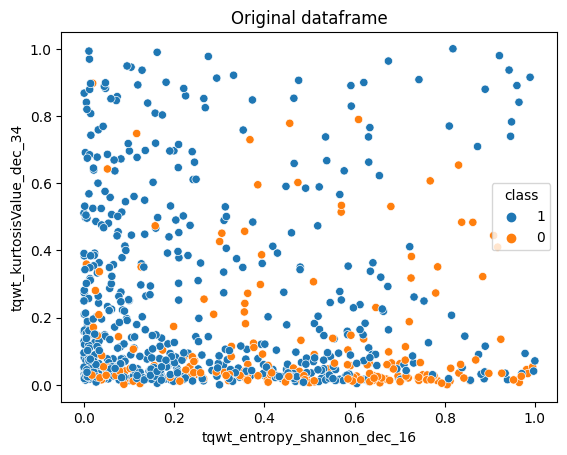

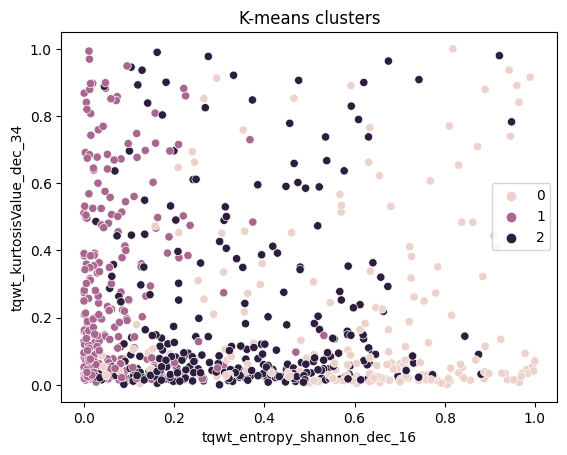

Number of principal components: 31


In [3]:
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import cluster
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA


data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)

scaler = MinMaxScaler()
scaledDF = scaler.fit_transform(df)
scaledDF = pd.DataFrame(scaledDF, columns=df.columns)

print("SHAPE:", scaledDF.shape)

scaledDF = scaledDF.drop(columns=['class'])

labels = []
silhouettes = []
purity = []

def purity_score(y_true, y_pred):
    confusion_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix) 

for i in range(3):
    kmeans = KMeans(n_clusters = 3, random_state = i).fit(scaledDF)
    y_pred = kmeans.labels_
    labels.append(y_pred)
    silhouettes.append(metrics.silhouette_score(scaledDF, y_pred, metric='euclidean'))
    purity.append(purity_score(df["class"], y_pred))

print("Silhouette scores: ", silhouettes)
print("Purity scores: ", purity)


#What is causing the non-determinism?

#The non-determinism is caused by the random initialization of the centroids. The algorithm will converge to a local minimum, which is why the results are different for different seeds.

variances = scaledDF.var()

variances = variances.sort_values(ascending=False)
variances = variances[:2]

sns.scatterplot(x = scaledDF[variances.index[0]], y = scaledDF[variances.index[1]], hue = df["class"])
plt.title("Original dataframe")
plt.show()

sns.scatterplot(x = scaledDF[variances.index[0]], y = scaledDF[variances.index[1]], hue = labels[0])
plt.title("K-means clusters")
plt.show()

#print(variances)

#print(len(df_scaled["tqwt_kurtosisValue_dec_34"]))

#print(len(df_scaled["tqwt_entropy_shannon_dec_16"]))

pca = PCA(n_components=0.8)
pca.fit(scaledDF)
print("Number of principal components:", pca.n_components_)
